/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5231.4673 - mae: 51.0433 - val_loss: 862.7997 - val_mae: 18.0563
Epoch 2/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 912.7580 - mae: 18.4469 - val_loss: 624.7330 - val_mae: 14.2659
Epoch 3/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 756.5702 - mae: 16.2750 - val_loss: 592.1542 - val_mae: 13.5699
Epoch 4/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 605.7711 - mae: 15.1171 - val_loss: 583.6945 - val_mae: 13.2514
Epoch 5/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 577.3848 - mae: 14.6605 - val_loss: 571.0568 - val_mae: 13.0048
Epoch 6/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 598.3869 - mae: 14.3194 - val_loss: 567.0687 - val_mae: 12.9268
Epoch 7/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 680.1039 - mae: 15.0664 - val_loss: 568.4033 - val_mae: 12.9431
Epoch 8/50
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 669.2281 - mae: 14.5072 - val_loss: 563.0587 - val_mae: 12.7963
Epoch 9

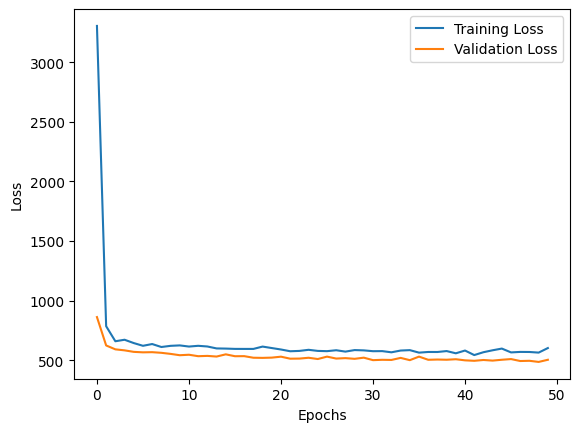

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/city_day.csv")

df = df.dropna()


df = df.select_dtypes(include=[np.number])

features = ['NO2', 'SO2', 'CO', 'O3', 'PM10']  # Adjust based on dataset columns
target = 'PM2.5'

X = df[features]
y = df[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

plt.plot(history.history['loss' ], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


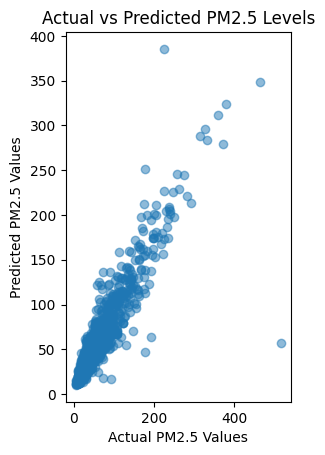

In [19]:
y_pred = model.predict(X_test)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual PM2.5 Values")
plt.ylabel("Predicted PM2.5 Values")
plt.title("Actual vs Predicted PM2.5 Levels")
plt.show()
